In [3]:
print("1. Lectura y procesamiento inicial")
print("-" * 35)

import pandas as pd

1. Lectura y procesamiento inicial
-----------------------------------


In [15]:
# 1 LECTURA Y PROCESAMIENTO INICIAL
import pandas as pd

print("1. Lectura y procesamiento inicial")
df = pd.read_csv('Aportes_Hidricos_Energia_Ituango_2024.csv', sep=';', encoding='utf-8')

# Cargar datos con separador correcto
df = pd.read_csv('Aportes_Hidricos_Energia_Ituango_2024.csv', sep=";", encoding="utf-8")

# Normalizar nombres de columnas
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Conversión de fechas (formato mixto tolerante)
df["fecha"] = pd.to_datetime(df["fecha"], errors="coerce", dayfirst=True)

# Conversión de valores a numérico (quitando separadores de miles)
df["aportes_w"] = df["aportes_w"].astype(str).str.replace(",", "", regex=False)
df["aportes_w"] = pd.to_numeric(df["aportes_w"], errors="coerce")

# Guardar registros iniciales
registros_iniciales = len(df)

# Eliminar duplicados exactos
duplicados_exactos = df.duplicated().sum()
df = df.drop_duplicates()

# Eliminar duplicados temporales (misma fecha y valor)
duplicados_temporales = df.duplicated(subset=["fecha"], keep=False).sum()
if duplicados_temporales > 0:
    df = df.groupby("fecha", as_index=False)["aportes_w"].mean()

# Resultados esperados
print("ETAPA 1 RESULTADOS")
print(f"Total registros resultantes: {len(df)}")
print(f"Duplicados exactos eliminados: {duplicados_exactos}")
print(f"Duplicados temporales promediados: {duplicados_temporales}")
print(f"Aporte mínimo: {df['aportes_w'].min():,.0f} W")
print(f"Aporte máximo: {df['aportes_w'].max():,.0f} W")
print(f"Aporte promedio: {df['aportes_w'].mean():,.0f} W")
print(f"Aporte más frecuente (moda): {df['aportes_w'].mode()[0]:,.0f} W")

1. Lectura y procesamiento inicial
ETAPA 1 RESULTADOS
Total registros resultantes: 366
Duplicados exactos eliminados: 0
Duplicados temporales promediados: 120
Aporte mínimo: 4,475,400 W
Aporte máximo: 97,578,500 W
Aporte promedio: 24,284,758 W
Aporte más frecuente (moda): 17,744,000 W


In [21]:

# 2: ANÁLISIS DE OUTLIERS (IQR)

q1 = df['aportes_w'].quantile(0.25)
q3 = df['aportes_w'].quantile(0.75)
iqr = q3 - q1
lim_inf = q1 - 1.5 * iqr
lim_sup = q3 + 1.5 * iqr

# Detectar outliers
outliers = df[(df['aportes_w'] < lim_inf) | (df['aportes_w'] > lim_sup)]
total_outliers = len(outliers)
porcentaje_outliers = (total_outliers / len(df)) * 100

# Clasificación de outliers
outliers['tipo'] = np.where(outliers['aportes_w'] > lim_sup, 'Superior', 'Inferior')

# Conteo por valor de outlier
conteo_outliers = outliers.groupby(['aportes_w', 'tipo']).size().reset_index(name='frecuencia')
conteo_outliers['% del total outliers'] = (conteo_outliers['frecuencia'] / total_outliers) * 100

print("ETAPA 2 RESULTADOS")
print(f"Total outliers detectados: {total_outliers} ({porcentaje_outliers:.2f}%)")
print("\nFrecuencia de cada outlier detectado:")
print(conteo_outliers)


ETAPA 2 RESULTADOS
Total outliers detectados: 30 (8.20%)

Frecuencia de cada outlier detectado:
     aportes_w      tipo  frecuencia  % del total outliers
0   60382900.0  Superior           1              3.333333
1   61035400.0  Superior           1              3.333333
2   61601800.0  Superior           1              3.333333
3   61990900.0  Superior           1              3.333333
4   62574800.0  Superior           1              3.333333
5   62772500.0  Superior           1              3.333333
6   63096300.0  Superior           1              3.333333
7   63502200.0  Superior           1              3.333333
8   66237700.0  Superior           1              3.333333
9   66423500.0  Superior           1              3.333333
10  66824300.0  Superior           1              3.333333
11  67166400.0  Superior           1              3.333333
12  67274800.0  Superior           1              3.333333
13  68384000.0  Superior           1              3.333333
14  68865100.0  Sup

/tmp/ipython-input-1281337352.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers['tipo'] = np.where(outliers['aportes_w'] > lim_sup, 'Superior', 'Inferior')


In [25]:
meses_es = {
    1: "Enero", 2: "Febrero", 3: "Marzo", 4: "Abril",
    5: "Mayo", 6: "Junio", 7: "Julio", 8: "Agosto",
    9: "Septiembre", 10: "Octubre", 11: "Noviembre", 12: "Diciembre"
}

df['mes_nombre'] = df['fecha'].dt.month.map(meses_es)


In [27]:

# 3: COMPORTAMIENTO POR SEMANA Y POR MES

df['semana'] = df['fecha'].dt.isocalendar().week
df['mes'] = df['fecha'].dt.month
df['mes_nombre'] = df['fecha'].dt.month_name()

# Estadísticas por semana
semana_stats = df.groupby('semana')['aportes_w'].agg(['min', 'mean', 'max']).reset_index()

# Estadísticas por mes
mes_stats = df.groupby('mes_nombre')['aportes_w'].agg(['min', 'mean', 'max']).reset_index()

print("ETAPA 3 RESULTADOS - Semana")
print(semana_stats)

print("\nETAPA 3 RESULTADOS - Mes")
print(mes_stats)


ETAPA 3 RESULTADOS - Semana
    semana         min          mean         max
0        1  17541200.0  2.603301e+07  44506500.0
1        2  13707800.0  1.502267e+07  16731500.0
2        3   9578900.0  1.247059e+07  14980200.0
3        4   8012200.0  8.949500e+06  10060500.0
4        5   7812900.0  9.898357e+06  17744000.0
5        6  11939500.0  1.560336e+07  17695700.0
6        7   7998700.0  9.323000e+06  10750100.0
7        8   6604700.0  8.825743e+06  12690600.0
8        9   5992500.0  8.043000e+06  11324500.0
9       10   7377900.0  9.038500e+06  10828700.0
10      11   5446800.0  6.566086e+06   7725300.0
11      12   4475400.0  5.810071e+06   7150700.0
12      13   4601300.0  7.316300e+06   9560600.0
13      14  10629700.0  1.648266e+07  20823800.0
14      15   8215200.0  1.209391e+07  15804900.0
15      16   8038500.0  1.120260e+07  17421700.0
16      17  23023900.0  2.787394e+07  32125800.0
17      18  35312000.0  3.925316e+07  48509000.0
18      19  39148300.0  6.084179e+07  762

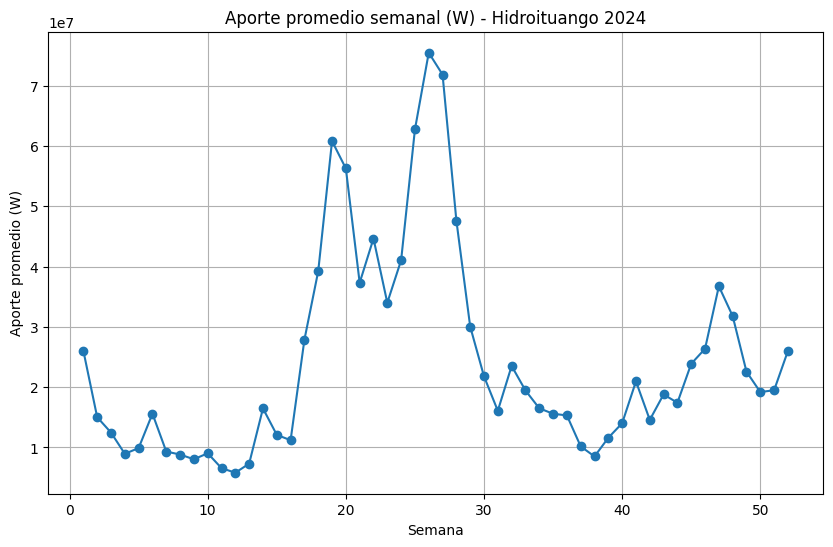

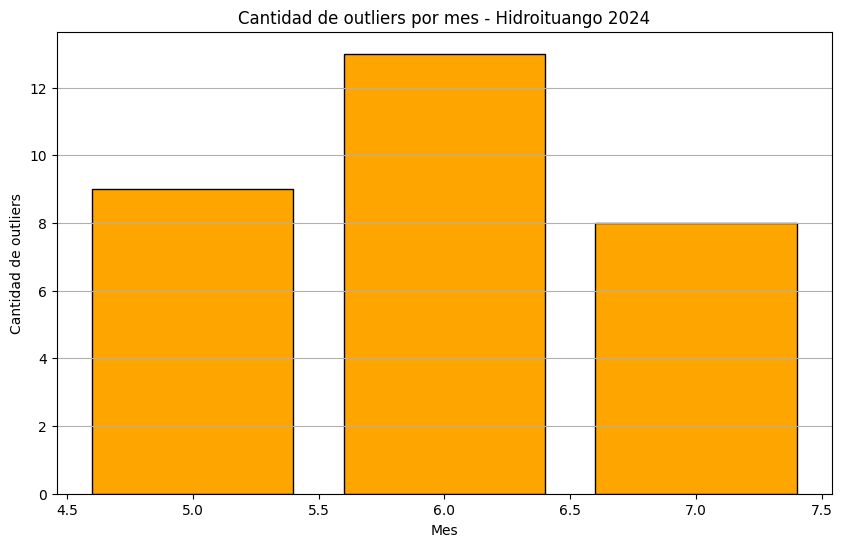

In [28]:

# 4: VISUALIZACIONES


# 1. Aporte promedio por semana
plt.figure(figsize=(10,6))
plt.plot(semana_stats['semana'], semana_stats['mean'], marker='o')
plt.title('Aporte promedio semanal (W) - Hidroituango 2024')
plt.xlabel('Semana')
plt.ylabel('Aporte promedio (W)')
plt.grid(True)
plt.show()

# 2. Outliers por mes
outliers_mes = outliers.groupby('mes').size().reset_index(name='cantidad_outliers')
plt.figure(figsize=(10,6))
plt.bar(outliers_mes['mes'], outliers_mes['cantidad_outliers'], color='orange', edgecolor='black')
plt.title('Cantidad de outliers por mes - Hidroituango 2024')
plt.xlabel('Mes')
plt.ylabel('Cantidad de outliers')
plt.grid(axis='y')
plt.show()


5: Preguntas de interpretación de códigos y resultados.



¿Qué patrones temporales identificaste en los aportes energéticos?
En los meses de abril y octubre se presentaron mas lluvias y los meses entre enero y julio la temporada fue mas seca

¿Qué puedes decir de la tendencia de comportamiento de los outliers para cada mes?
Los meses mas lluviosos como abril y octubre presentaron outliers más altos y más frecuentes.

Los meses mas secos como de enero a julio los outliers fueron más escasos y menos extremos

¿Cuáles fueron los principales desafíos de calidad de datos y cómo los resolviste?
Diferentes formatos de fechas y esto nos impedia ordenar y agrupar los datos, por lo cual tuve que estandarizarlos con  pd.to_datetime(..., errors='coerce', dayfirst=True)

Habían varios duplicados exactos, uno con con fechas y valores, tambien se confirmó en excel los valores exactos y se eliminaron para posterior usar el promedio por timestamp.

Habían valores con picos muy altos, pero eran datos que podían demostrar errores en la medición y se debían conservar
El separador decimal usaban comas(,) se reemplazó para pasar los datos a float


¿Qué recomendaciones harías para mejorar la recolección de datos futura?
Evitar duplicados en el archivo de los datos
Unificar los formatos de fechas



¿Cómo podrían estos análisis ayudar en la planificación energética?
Anticiparnos a los meses que son mas secos para hacer contingencias a nivel uso de energía, tambien nos ayuda a saber generalmente los meses de mas lluvia y así poder tomar medidas en los enbalses o en zanas de riesgo.
Otra cosa tambien importante que los meses donde los datos son mas constantes y no dan tanto valor pdrogramar mantenimiento de los equipos de medición.
Con esta información podemos crear modelos de predicción automaticos que nos van a ayudar en el analisis de la información en tiempo real
